In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             roc_auc_score, mean_squared_error, mean_absolute_error,
                             classification_report)

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import entropy, ks_2samp, ttest_ind
# from skmultiflow.drift_detection import PageHinkley

In [34]:
n1 = random.randint(1, 100)
n2 = random.randint(1, 100)
n3 = random.randint(1, 100)
n4 = random.randint(1, 100)
n1,n2,n3,n4

(99, 8, 10, 63)

In [35]:
# from sklearn.datasets import load_diabetes

# # Cargar el dataset de diabetes
# diabetes = load_diabetes()

# # Convertir a DataFrame
# data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
# data['target'] = diabetes.target  # Agregar la columna de objetivos (target)

# X1 = sample1.loc[:,['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
# y1 = sample1.loc[:,['target']]

# X2 = sample2.loc[:,['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
# y2 = sample2.loc[:,['target']]

data = pd.read_csv('covertype_train.csv', sep = ',', decimal = '.', header = 0, encoding = 'utf-8')
data.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2991,7,67,11,1015,233,234,1570,1
1,2876,18,485,71,2495,192,202,1557,1
2,3171,2,277,9,4374,213,237,1052,0
3,3087,13,190,31,4774,193,221,752,0
4,2835,10,212,41,3596,231,242,3280,1


In [36]:
# Crear dos muestras del DataFrame
historical_data = data.sample(frac=0.8, random_state=n1)  
recent_data = data.sample(frac=0.3, random_state=n2) 

# Suponiendo que la última columna es la variable objetivo
target_column = 'Cover_Type'

# Separar las características y la variable objetivo
X_historical = historical_data.drop(columns=[target_column])
y_historical = historical_data[target_column]

X_recent = recent_data.drop(columns=[target_column])
y_recent = recent_data[target_column]

In [37]:
data.shape, X_historical.shape, X_recent.shape

((116203, 9), (92962, 8), (34861, 8))

# Experimento 1: Evaluación de Desempeño del Modelo

Métricas de Precisión: Revisión de métricas como exactitud, precisión, recall, F1-score, AUC-ROC, etc. Comparar estas métricas con las expectativas o benchmarks iniciales.
Errores de Predicción: Análisis de la tasa de error (por ejemplo, error cuadrático medio, error absoluto medio) en un conjunto de datos de validación.
Desglose de Errores: Análisis de los errores cometidos en diferentes subgrupos del conjunto de datos para identificar posibles sesgos o problemas específicos.

In [39]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_historical, y_historical, test_size = 0.2, random_state = n1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_recent, y_recent, test_size = 0.2, random_state = n2)

In [40]:
# Crear modelos 
model1 = DecisionTreeClassifier(random_state=n3).fit(X_train1, y_train1)
model2 = DecisionTreeClassifier(random_state=n4).fit(X_train2, y_train2)

# Predicciones de los modelos
y_pred1 = model1.predict(X_test1)
y_pred2 = model2.predict(X_test2)

metrics = {}
metrics['model1'] = {
    'accuracy': accuracy_score(y_test1, y_pred1),
    'precision': precision_score(y_test1, y_pred1, average='weighted'),
    'recall': recall_score(y_test1, y_pred1, average='weighted'),
    'f1_score': f1_score(y_test1, y_pred1, average='weighted'),
    'roc_auc': roc_auc_score(y_test1, model1.predict_proba(X_test1), multi_class='ovr')
}
metrics['model2'] = {
    'accuracy': accuracy_score(y_test2, y_pred2),
    'precision': precision_score(y_test2, y_pred2, average='weighted'),
    'recall': recall_score(y_test2, y_pred2, average='weighted'),
    'f1_score': f1_score(y_test2, y_pred2, average='weighted'),
    'roc_auc': roc_auc_score(y_test2, model2.predict_proba(X_test2), multi_class='ovr')
}

errors = {}
errors['model1'] = {
    'mse': mean_squared_error(y_test1, y_pred1),
    'mae': mean_absolute_error(y_test1, y_pred1)
}
errors['model2'] = {
    'mse': mean_squared_error(y_test2, y_pred2),
    'mae': mean_absolute_error(y_test2, y_pred2)
}

metrics, errors

({'model1': {'accuracy': 0.8205776367450116,
   'precision': 0.8208786835460556,
   'recall': 0.8205776367450116,
   'f1_score': 0.8207104794732611,
   'roc_auc': 0.8518633592954362},
  'model2': {'accuracy': 0.754194751183135,
   'precision': 0.7541431838973099,
   'recall': 0.754194751183135,
   'f1_score': 0.753993240729493,
   'roc_auc': 0.801841882354277}},
 {'model1': {'mse': 0.9681600602377238, 'mae': 0.3217877695907062},
  'model2': {'mse': 1.3760217983651226, 'mae': 0.4444285099670156}})

Sugerencia: En el momento que el recall caiga 5% o 10% (definir); se debe tener el y en ambos casos.

# Experimento 2: Concept drift

Ocurre cuando las propiedades estadísticas de la variable objetivo, que el modelo intenta predecir, cambian con el tiempo de manera imprevista. Esto causa problemas porque las predicciones se vuelven menos precisas a medida que pasa el tiempo. La detección y adaptación de la deriva son de suma importancia en los campos que involucran datos y modelos de datos que cambian dinámicamente. En wiki hay ejemplo.

wiki: https://en.wikipedia.org/wiki/Concept_drift


In [42]:
# Dividir los datos históricos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_historical, y_historical, test_size=0.2, random_state=n3)

# Entrenar el modelo
model = RandomForestClassifier(random_state=n4)
model.fit(X_train, y_train)

# Evaluar el modelo en los datos de prueba históricos
y_pred_historical = model.predict(X_test)
historical_accuracy = accuracy_score(y_test, y_pred_historical)
historical_recall = recall_score(y_test, y_pred_historical, average='weighted')

print("Rendimiento en datos históricos:")
print(f"Precisión: {historical_accuracy}")
print(f"Recall: {historical_recall}")
print(classification_report(y_test, y_pred_historical))

Rendimiento en datos históricos:
Precisión: 0.8826440058086377
Recall: 0.8826440058086377
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      6719
           1       0.88      0.92      0.90      9085
           2       0.86      0.85      0.85      1188
           3       0.90      0.72      0.80        92
           4       0.89      0.44      0.59       288
           5       0.81      0.64      0.72       557
           6       0.96      0.82      0.88       664

    accuracy                           0.88     18593
   macro avg       0.89      0.75      0.80     18593
weighted avg       0.88      0.88      0.88     18593



In [43]:
# Evaluar el modelo en los datos recientes
y_pred_recent = model.predict(X_recent)
recent_accuracy = accuracy_score(y_recent, y_pred_recent)
recent_recall = recall_score(y_recent, y_pred_recent, average='weighted')

print("Rendimiento en datos recientes:")
print(f"Precisión: {recent_accuracy}")
print(f"Recall: {recent_recall}")
print(classification_report(y_recent, y_pred_recent))

Rendimiento en datos recientes:
Precisión: 0.957000659763059
Recall: 0.957000659763059
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     12702
           1       0.96      0.97      0.96     16993
           2       0.95      0.95      0.95      2128
           3       0.96      0.90      0.93       177
           4       0.97      0.78      0.86       596
           5       0.94      0.88      0.91      1045
           6       0.99      0.93      0.96      1220

    accuracy                           0.96     34861
   macro avg       0.96      0.91      0.93     34861
weighted avg       0.96      0.96      0.96     34861



In [44]:
print("Comparación de rendimiento:")
print(f"Precisión en datos históricos: {historical_accuracy}")
print(f"Precisión en datos recientes: {recent_accuracy}")

print(f"Recall en datos históricos: {historical_recall}")
print(f"Recall en datos recientes: {recent_recall}")

Comparación de rendimiento:
Precisión en datos históricos: 0.8826440058086377
Precisión en datos recientes: 0.957000659763059
Recall en datos históricos: 0.8826440058086377
Recall en datos recientes: 0.957000659763059


In [45]:
# Evaluar la significancia de la diferencia usando una prueba z de proporciones
count = np.array([sum(y_test == y_pred_historical), sum(y_recent == y_pred_recent)])
nobs = np.array([len(y_test), len(y_recent)])
stat, pval = proportions_ztest(count, nobs)

print(f"Prueba Z: Estadístico = {stat:.4f}, p-valor = {pval:.4f}")

# Decidir si volver a entrenar el modelo
threshold = 0.05  # Umbral de caída de precisión
if recent_accuracy < historical_accuracy * (1 - threshold) or pval < 0.05:
    print("Es necesario volver a entrenar el modelo debido a una caída significativa en el rendimiento.")
else:
    print("El rendimiento del modelo es estable. No es necesario volver a entrenar el modelo en este momento.")

Prueba Z: Estadístico = -32.3351, p-valor = 0.0000
Es necesario volver a entrenar el modelo debido a una caída significativa en el rendimiento.


In [46]:
# Evaluar la significancia de la diferencia usando una prueba z de proporciones
count = np.array([sum(y_test == y_pred_historical), sum(y_recent == y_pred_recent)])
nobs = np.array([len(y_test), len(y_recent)])
stat, pval = proportions_ztest(count, nobs)

print(f"Prueba Z: Estadístico = {stat:.4f}, p-valor = {pval:.4f}")

# Decidir si volver a entrenar el modelo
threshold = 0.05  # Umbral de caída de precisión
if recent_recall < historical_recall * (1 - threshold) or pval < 0.05:
    print("Es necesario volver a entrenar el modelo debido a una caída significativa en el rendimiento.")
else:
    print("El rendimiento del modelo es estable. No es necesario volver a entrenar el modelo en este momento.")

Prueba Z: Estadístico = -32.3351, p-valor = 0.0000
Es necesario volver a entrenar el modelo debido a una caída significativa en el rendimiento.


Decisión de reentrenamiento: Comparar la precisión reciente con la precisión histórica ajustada por un umbral. Si la precisión reciente cae significativamente o si el p-valor de la prueba es menor que 0.05, se sugiere reentrenar el modelo.

Nuevamente deberiamos contar con y

# Experimento 3: Distancia de Kullback-Leibler (KL), Test de Kolmogorov-Smirnov (KS-test), Método de Page-Hinkley

## La distancia de Kullback-Leibler 

Mide la diferencia entre dos distribuciones de probabilidad.

En wikipedia estan las formulas

link wiki: https://es.wikipedia.org/wiki/Divergencia_de_Kullback-Leibler

## Test de Kolmogorov-Smirnov (KS-test)

Prueba no paramétrica que determina la bondad de ajuste de dos distribuciones de probabilidad entre sí.

En wikipedia estan las formulas

link wiki: https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test

## Método de Page-Hinkley 

Intenta identificar momentos en los que cambia la distribución de probabilidad de un proceso estocástico o una serie de tiempo . En general, el problema concierne tanto a detectar si se ha producido o no un cambio, o si podrían haber ocurrido varios cambios, como a identificar los momentos en que se produjeron dichos cambios.

Este no lo pude hacer andar

link wiki: https://en.wikipedia.org/wiki/Change_detection

In [47]:
def kl_divergence(p, q):
    return entropy(p, q)

In [48]:
# Suponiendo que 'target_column' es una columna específica que deseas comparar
historical_feature = historical_data[target_column].value_counts(normalize=True)
recent_feature = recent_data[target_column].value_counts(normalize=True)

# Alinear los índices de las distribuciones
all_index = historical_feature.index.union(recent_feature.index)
p = historical_feature.reindex(all_index, fill_value=0)
q = recent_feature.reindex(all_index, fill_value=0)

kl_div = kl_divergence(p, q)
print(f"KL Divergence: {kl_div}")

threshold_kl = 0.1  # Define un umbral apropiado para tu contexto
if kl_div > threshold_kl:
    print("Drift detectado en la distribución de la característica.")
else:
    print("No se detectó drift en la distribución de la característica.")

KL Divergence: 7.400270656106431e-05
No se detectó drift en la distribución de la característica.


In [49]:
# Suponiendo que 'target_column' es una columna específica que deseas comparar
ks_stat, p_value = ks_2samp(historical_data[target_column], recent_data[target_column])
print(f"KS Statistic: {ks_stat}, p-value: {p_value}")

threshold_p_value = 0.05  # Nivel de significancia
if p_value < threshold_p_value:
    print("Drift detectado en la característica.")
else:
    print("No se detectó drift en la característica.")

KS Statistic: 0.00171333701874965, p-value: 0.9999993440270813
No se detectó drift en la característica.


In [50]:
# # Suponiendo que 'target_column' es una columna específica que deseas comparar
# ph = PageHinkley()

# # Actualizar el detector con datos históricos
# for value in historical_data[target_column]:
#     ph.add_element(value)

# # Verificar si se detecta un cambio en los datos recientes
# drift_detected = False
# for value in recent_data[target_column]:
#     ph.add_element(value)
#     if ph.detected_change():
#         drift_detected = True
#         break

# if drift_detected:
#     print("Drift detectado en la característica.")
# else:
#     print("No se detectó drift en la característica.")

## Conclusiones

- Distancia de Kullback-Leibler: Compara distribuciones de probabilidad y es útil cuando tienes datos categóricos.
- Test de Kolmogorov-Smirnov: Compara distribuciones acumulativas y es útil para datos continuos.
- Método de Page-Hinkley: Detecta cambios abruptos en el promedio de una señal y es útil para flujos de datos continuos.

# Experimento 4: Uso de feetback pero este no es posible

# Experimento 5: Inspección de Feature Importance

                              feature  importance
0                           Elevation    0.351927
4     Horizontal_Distance_To_Roadways    0.145987
7  Horizontal_Distance_To_Fire_Points    0.138171
2    Horizontal_Distance_To_Hydrology    0.079486
3      Vertical_Distance_To_Hydrology    0.078422
5                       Hillshade_9am    0.076453
6                      Hillshade_Noon    0.074910
1                               Slope    0.054643


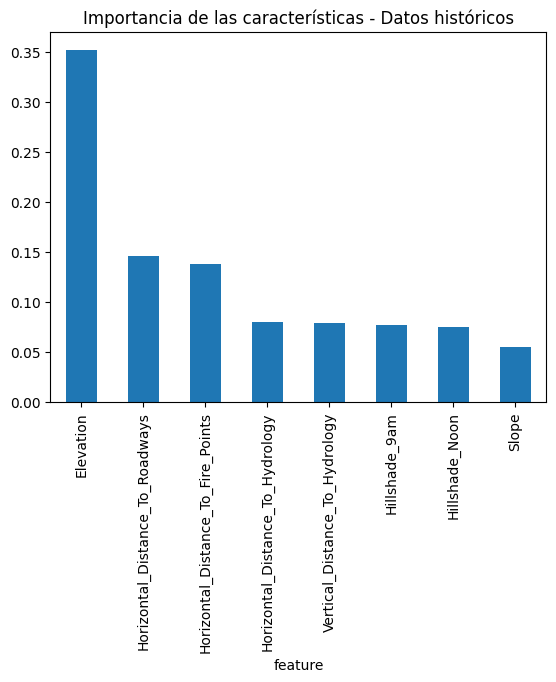

In [52]:
# Entrenar el modelo
model_historical = RandomForestClassifier(random_state=n3)
model_historical.fit(X_historical, y_historical)

# Obtener la importancia de las características
importance_historical = model_historical.feature_importances_

# Crear un DataFrame para visualizar la importancia
features_historical = pd.DataFrame({
    'feature': X_historical.columns,
    'importance': importance_historical
}).sort_values(by='importance', ascending=False)

print(features_historical)

# Visualizar la importancia de las características
features_historical.plot(kind='bar', x='feature', y='importance', legend=False)
plt.title('Importancia de las características - Datos históricos')
plt.show()

                              feature  importance
0                           Elevation    0.348125
4     Horizontal_Distance_To_Roadways    0.138153
7  Horizontal_Distance_To_Fire_Points    0.129335
2    Horizontal_Distance_To_Hydrology    0.082067
5                       Hillshade_9am    0.081428
3      Vertical_Distance_To_Hydrology    0.080568
6                      Hillshade_Noon    0.080247
1                               Slope    0.060078


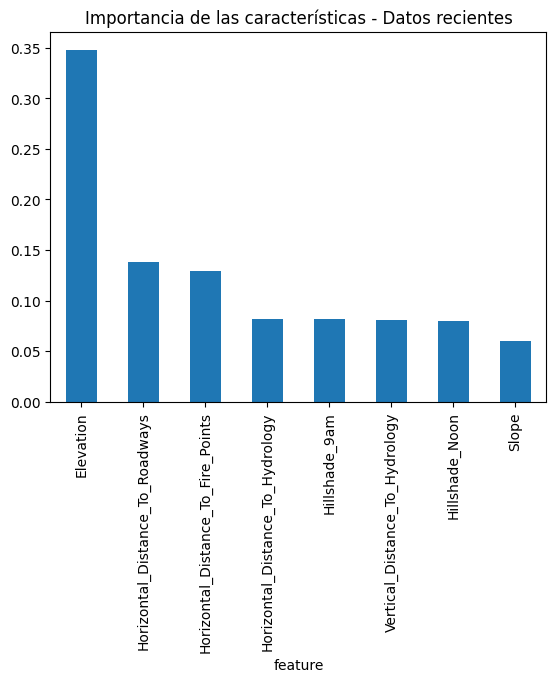

In [53]:
# Evaluar el modelo entrenado en los datos recientes (opcional: puedes reentrenar el modelo si es necesario)
model_recent = RandomForestClassifier(random_state=n4)
model_recent.fit(X_recent, y_recent)

# Obtener la importancia de las características
importance_recent = model_recent.feature_importances_

# Crear un DataFrame para visualizar la importancia
features_recent = pd.DataFrame({
    'feature': X_recent.columns,
    'importance': importance_recent
}).sort_values(by='importance', ascending=False)

print(features_recent)

# Visualizar la importancia de las características
features_recent.plot(kind='bar', x='feature', y='importance', legend=False)
plt.title('Importancia de las características - Datos recientes')
plt.show()

In [54]:
# Combinar las importancias de las características en un solo DataFrame
importance_comparison = features_historical.merge(features_recent, on='feature', suffixes=('_historical', '_recent'))

# Calcular la diferencia en importancia
importance_comparison['difference'] = importance_comparison['importance_recent'] - importance_comparison['importance_historical']
importance_comparison = importance_comparison.sort_values(by='difference', ascending=False)
importance_comparison

,feature,importance_historical,importance_recent,difference
7,Slope,0.054643,0.060078,0.005435
6,Hillshade_Noon,0.074910,0.080247,0.005336
5,Hillshade_9am,0.076453,0.081428,0.004975
3,Horizontal_Distance_To_Hydrology,0.079486,0.082067,0.002580
4,Vertical_Distance_To_Hydrology,0.078422,0.080568,0.002145
0,Elevation,0.351927,0.348125,-0.003801
1,Horizontal_Distance_To_Roadways,0.145987,0.138153,-0.007835
2,Horizontal_Distance_To_Fire_Points,0.138171,0.129335,-0.008836


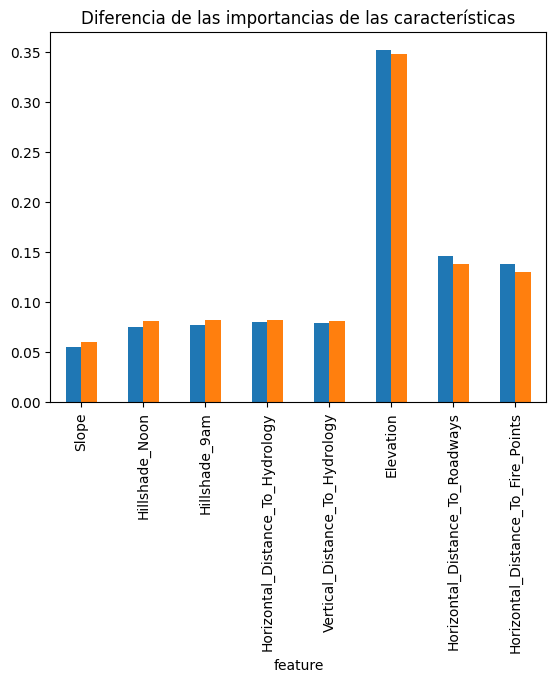

In [55]:
# Visualizar la comparación de importancia
importance_comparison.plot(kind='bar', x='feature', y=['importance_historical', 'importance_recent'], legend=False)
plt.title('Diferencia de las importancias de las características')
plt.show()

## Pasos 

**Entrenar el Modelo y Obtener la Importancia:** Entrenar modelo en datos históricos y recientes, y obtener la importancia de las características para cada conjunto de datos.

**Comparar Importancia de Características:** Analizar y comparar la importancia de las características entre los conjuntos de datos históricos y recientes para detectar cambios significativos.

**Introducción de Nuevas Características:** Si hay nuevas características disponibles, introducirla en el modelo y evaluar su impacto en la importancia de las características y el rendimiento del modelo.

Esta metodología permite detectar cambios en la relevancia de las características, lo cual puede ser un indicativo de cambios en la distribución de los datos subyacentes y la necesidad de ajustar o reentrenar tu modelo.

## Conclusion 

En este caso vemos que la mayor diferencia es de 0.005 por lo que no es para tomar una decicion, sin embargo se debe evaluar usar metodologias de seleccion de variables y modelos para en ese caso si tomar una decision.

# Experimento 6: A/B test 

Pero lo que entiendo es que es más para ver si un modelo nuevo supera al historico

In [58]:
model_historical = RandomForestClassifier(random_state=n3)
model_historical.fit(X_historical, y_historical)

model_recent = RandomForestClassifier(random_state=n4)
model_recent.fit(X_recent, y_recent)

RandomForestClassifier(random_state=63)

In [59]:
# Obtener predicciones y calcular los errores
y_pred_historical = model_historical.predict(X_historical)
y_pred_recent = model_recent.predict(X_recent)

In [ ]:
# Obtener predicciones y calcular los errores
errors_historical = y_historical - y_pred_historical
errors_recent = y_recent - y_pred_recent

In [63]:
# Realizar la prueba t
t_stat, p_value = ttest_ind(errors_historical, errors_recent)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

threshold_p_value = 0.05  # Nivel de significancia
if p_value < threshold_p_value:
    print("La diferencia en rendimiento es estadísticamente significativa.")
else:
    print("La diferencia en rendimiento no es estadísticamente significativa.")

t-statistic: nan, p-value: nan
La diferencia en rendimiento no es estadísticamente significativa.


No tiendo el error, creo que toca train test pero no me queda claro

# Experimento 7: Benchmarking

Modelo actual vs otro tipo de modelos

1. Ordenar los datos
2. Seleccionar los modelos a entrenar
3. Calcular metricas
4. Elegir modelo dado las metricas
5. cross validation (se recomienda)

In [68]:
# Definir los modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=n3),
    "Random Forest": RandomForestClassifier(random_state=n3),
    "Support Vector Machine": SVC(random_state=n3),
    "Neural Network": MLPClassifier(random_state=n3)
}

In [71]:
# Entrenar y evaluar cada modelo
results = {}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    # Evaluar el rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, output_dict=True)
    # Guardar los resultados
    results[model_name] = {
        "accuracy": accuracy,
        "recall": recall,
        "report": report,
    }

C:\Users\Oscar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Oscar\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [72]:
# Mostrar los resultados
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print(f"Recall: {metrics['recall']}")
    print(f"Classification Report:\n {metrics['report']}")

Model: Decision Tree
Accuracy: 0.8226214166621847
Recall: 0.8226214166621847
Classification Report:
 {'0': {'precision': 0.8198545778305386, 'recall': 0.8222949843726745, 'f1-score': 0.8210729677515232, 'support': 6719}, '1': {'precision': 0.8483318700614574, 'recall': 0.8508530544854155, 'f1-score': 0.8495905918558003, 'support': 9085}, '2': {'precision': 0.804424778761062, 'recall': 0.7651515151515151, 'f1-score': 0.7842968075927524, 'support': 1188}, '3': {'precision': 0.6862745098039216, 'recall': 0.7608695652173914, 'f1-score': 0.7216494845360826, 'support': 92}, '4': {'precision': 0.5555555555555556, 'recall': 0.5555555555555556, 'f1-score': 0.5555555555555556, 'support': 288}, '5': {'precision': 0.6412478336221837, 'recall': 0.6642728904847397, 'f1-score': 0.652557319223986, 'support': 557}, '6': {'precision': 0.8232558139534883, 'recall': 0.7996987951807228, 'f1-score': 0.8113063407181055, 'support': 664}, 'accuracy': 0.8226214166621847, 'macro avg': {'precision': 0.73984927708

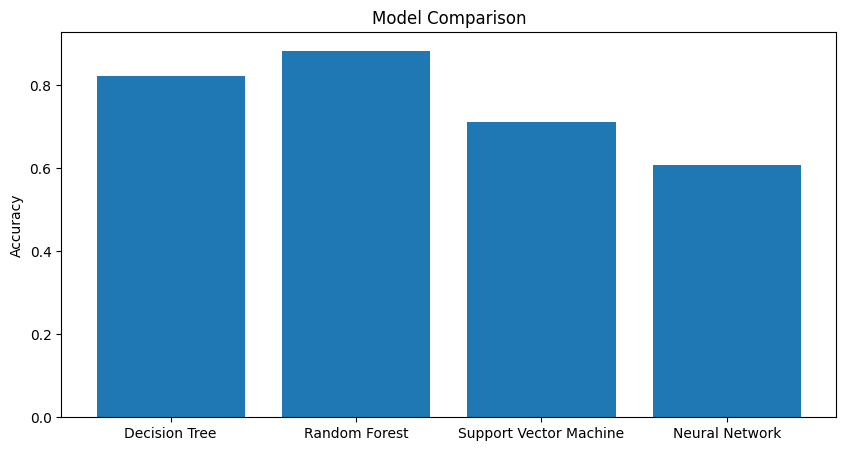

In [79]:
# Comparar la precisión de los modelos
accuracy_comparison = {model: metrics['accuracy'] for model, metrics in results.items()}

plt.figure(figsize=(10, 5))
plt.bar(accuracy_comparison.keys(), accuracy_comparison.values())
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

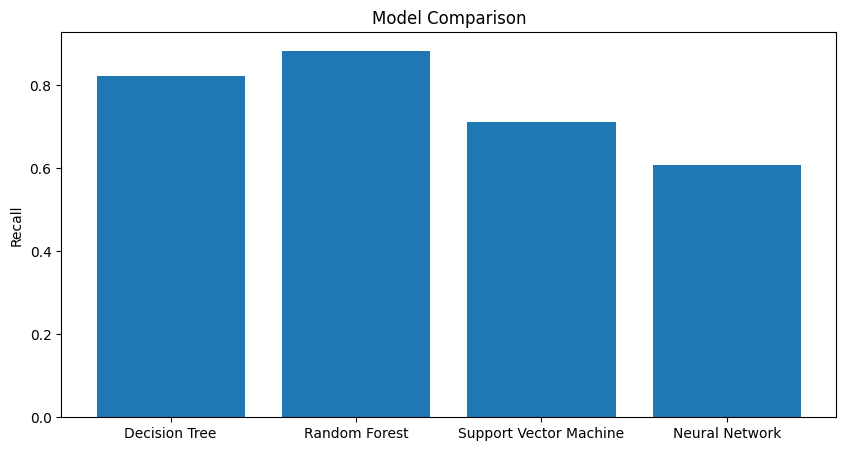

In [80]:
# Comparar el recall de los modelos
recall_comparison = {model: metrics['recall'] for model, metrics in results.items()}

plt.figure(figsize=(10, 5))
plt.bar(recall_comparison.keys(), recall_comparison.values())
plt.ylabel('Recall')
plt.title('Model Comparison')
plt.show()

In [81]:
# Seleccionar el mejor modelo basado en la precisión
best_model_name = max(accuracy_comparison, key=accuracy_comparison.get)
best_model_accuracy = accuracy_comparison[best_model_name]

print(f"El mejor modelo es: {best_model_name} con una precisión de {best_model_accuracy}")

El mejor modelo es: Random Forest con una precisión de 0.8837196794492551


In [82]:
# Seleccionar el mejor modelo basado en la recall
best_model_namer = max(recall_comparison, key=recall_comparison.get)
best_model_recall = recall_comparison[best_model_namer]

print(f"El mejor modelo es: {best_model_namer} con un recall de {best_model_recall}")

El mejor modelo es: Random Forest con un recall de 0.8837196794492551


In [97]:
# Realizar validación cruzada para el mejor modelo
best_model = models[best_model_name]
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5)

print(f"Validación cruzada para {best_model_name}:")
print(f"Scores: {cross_val_scores}")
print(f"Mean Accuracy: {cross_val_scores.mean()}")
print(f"Standard Deviation: {cross_val_scores.std()}")

Validación cruzada para Random Forest:
Scores: [0.86694904 0.86795751 0.86789028 0.86620949 0.86989847]
Mean Accuracy: 0.8677809586993914
Standard Deviation: 0.0012400472811322145


Revisar lo del recall que esta raro

# Experimento 8: Perturbaciones de Datos

In [98]:
def add_noise(X, noise_level=0.1):
    noise = np.random.normal(0, noise_level, X.shape)
    return X + noise

In [99]:
# Crear versiones perturbadas de los datos de prueba
X_test_noisy = add_noise(X_test)

In [101]:
# Entrenar el modelo
model = RandomForestClassifier(random_state=n3)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [103]:
# Evaluar el modelo en datos originales y perturbados
y_pred_original = model.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)
recall_original = recall_score(y_test, y_pred_original, average='weighted')

y_pred_noisy = model.predict(X_test_noisy)
accuracy_noisy = accuracy_score(y_test, y_pred_noisy)
recall_noisy = recall_score(y_test, y_pred_noisy, average='weighted')

print(f"Precisión en datos originales: {accuracy_original}")
print(f"Precisión en datos perturbados: {accuracy_noisy}")

print(f"Recall en datos originales: {recall_original}")
print(f"Recall en datos perturbados: {recall_noisy}")

Precisión en datos originales: 0.8837196794492551
Precisión en datos perturbados: 0.8835045447211316
Recall en datos originales: 0.8837196794492551
Recall en datos perturbados: 0.8835045447211316


In [106]:
# Comparar la robustez

robustness_drop = accuracy_original - accuracy_noisy
print(f"Caída en precisión debido a perturbaciones: {robustness_drop}")

robustness_drop2 = recall_original - recall_noisy
print(f"Caída en recall debido a perturbaciones: {robustness_drop2}")

Caída en precisión debido a perturbaciones: 0.00021513472812351164
Caída en recall debido a perturbaciones: 0.00021513472812351164


In [109]:
# Definir el modelo
model = RandomForestClassifier(random_state=n3)

# Definir la validación cruzada con k=5
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=n4)

# Calcular las puntuaciones de validación cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

print(f"Scores de validación cruzada: {cv_scores}")
print(f"Media de precisión: {cv_scores.mean()}")
print(f"Desviación estándar de precisión: {cv_scores.std()}")

Scores de validación cruzada: [0.86842813 0.86352024 0.86694904 0.86862982 0.86485578]
Media de precisión: 0.8664766015299035
Desviación estándar de precisión: 0.002001758438436133


Revisar si se puede cambiar la funcion de scoring

Aca se pueden comparar con otros modelos, que se realiza acontinuacion

In [114]:
# Definir los modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine": SVC(random_state=42)
}

In [115]:
# Evaluar cada modelo con validación cruzada y perturbaciones de datos
results = {}

for model_name, model in models.items():
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    mean_cv_score = cv_scores.mean()
    std_cv_score = cv_scores.std()
    
    # Entrenar el modelo y evaluar con datos perturbados
    model.fit(X_train, y_train)
    accuracy_original = accuracy_score(y_test, model.predict(X_test))
    accuracy_noisy = accuracy_score(y_test, model.predict(add_noise(X_test)))
    robustness_drop = accuracy_original - accuracy_noisy
    
    # Guardar los resultados
    results[model_name] = {
        "cv_mean_accuracy": mean_cv_score,
        "cv_std_accuracy": std_cv_score,
        "original_accuracy": accuracy_original,
        "noisy_accuracy": accuracy_noisy,
        "robustness_drop": robustness_drop
    }

C:\Users\Oscar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Oscar\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

In [116]:
# Mostrar los resultados (demoro 37 minutos)
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Mean CV Accuracy: {metrics['cv_mean_accuracy']}")
    print(f"Std CV Accuracy: {metrics['cv_std_accuracy']}")
    print(f"Original Accuracy: {metrics['original_accuracy']}")
    print(f"Noisy Accuracy: {metrics['noisy_accuracy']}")
    print(f"Robustness Drop: {metrics['robustness_drop']}\n")

Model: Random Forest
Mean CV Accuracy: 0.8672161063622703
Std CV Accuracy: 0.0028606348861332817
Original Accuracy: 0.8823750873984832
Noisy Accuracy: 0.8822675200344215
Robustness Drop: 0.00010756736406170031

Model: Logistic Regression
Mean CV Accuracy: 0.6540090429569612
Std CV Accuracy: 0.0022723911453666128
Original Accuracy: 0.6553541655461733
Noisy Accuracy: 0.6551390308180498
Robustness Drop: 0.00021513472812351164

Model: Support Vector Machine
Mean CV Accuracy: 0.7011254076138758
Std CV Accuracy: 0.003429500303638713
Original Accuracy: 0.7111278438121874
Noisy Accuracy: 0.71128919485828
Robustness Drop: -0.00016135104609260598



### Conclusiones 

**Perturbaciones de Datos**: Añade ruido a los datos y evalúa cómo afecta al rendimiento del modelo.
Validación Cruzada: Usa k-fold cross-validation para evaluar la robustez del modelo en diferentes particiones de los datos.

**Comparación de Modelos**: Compara múltiples modelos en términos de precisión promedio, desviación estándar y robustez ante perturbaciones.

Este enfoque permite seleccionar el modelo más robusto y estable, asegurando un mejor rendimiento en producción y una menor sensibilidad a las variaciones en los datos de entrada.

# Experimento 9: Reentrenamiento Programado

Establecer un calendario regular para revisar y reentrenar el modelo, asegurando que se mantenga actualizado

In [117]:
print('ok_')

ok_
